# Evalualte Layer Feature Space Correlation with Model Output Using Pearson Correlation

Evaluating layer at index: 100
Collected features for 500 samples from layer at index '100'.
Overall correlation score for the target layer: 0.05132412198837464
complete
Overall correlation score for the target layer: 0.05132412198837464


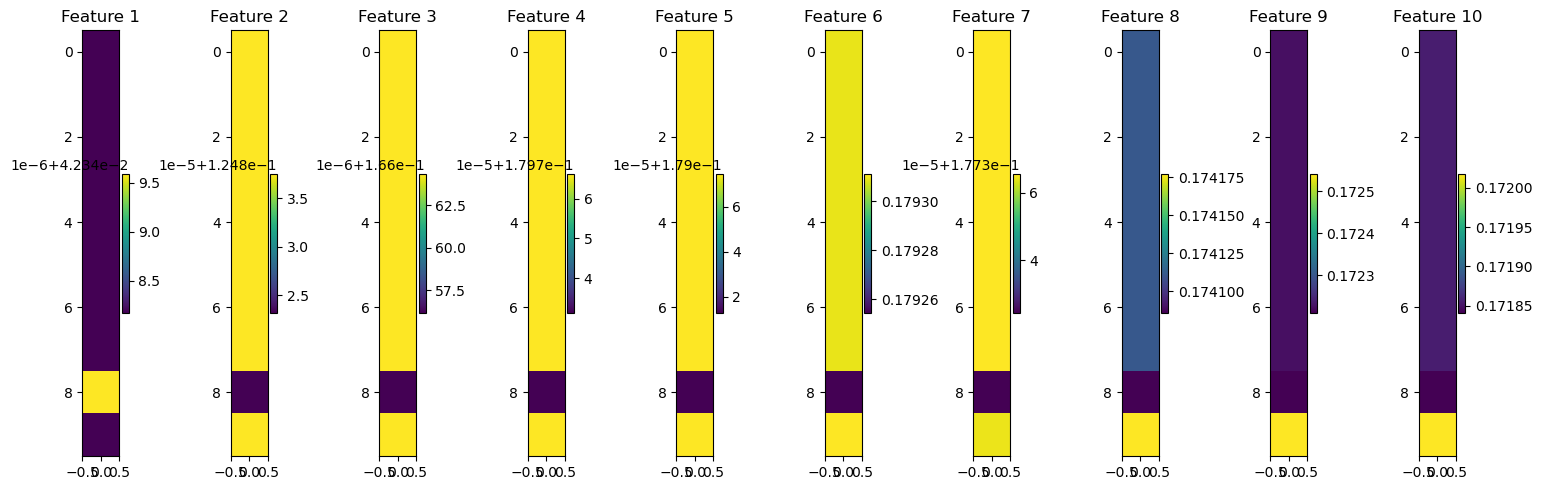

Evaluating layer at index: 120
Collected features for 500 samples from layer at index '120'.
Overall correlation score for the target layer: 0.04733728534946611
complete
Overall correlation score for the target layer: 0.04733728534946611


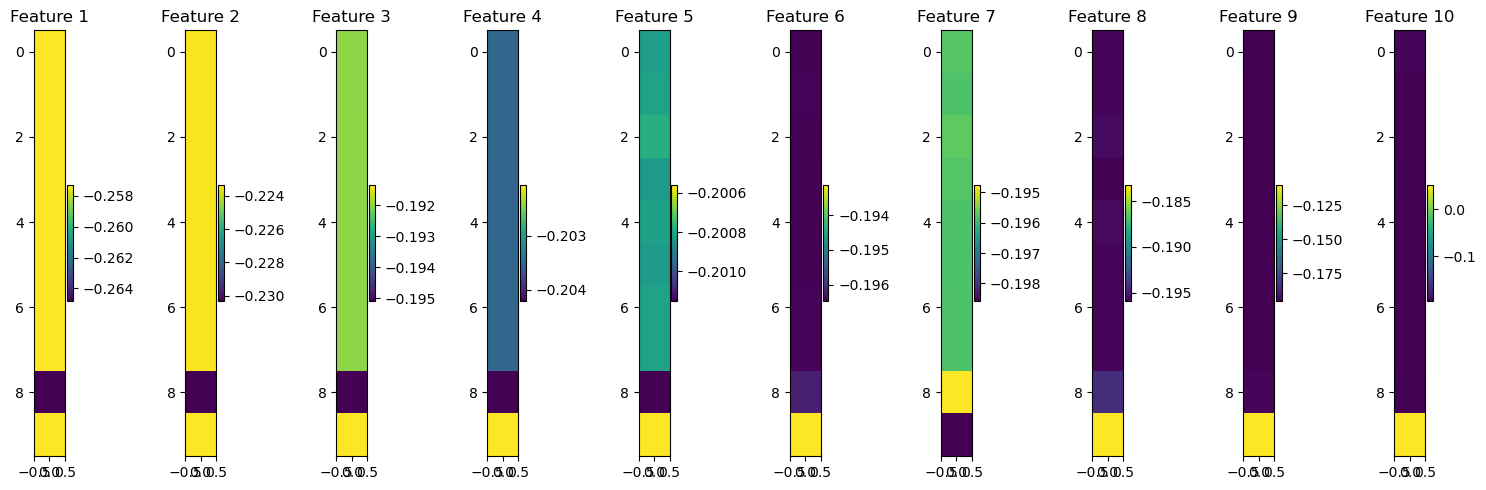

Evaluating layer at index: 140
Collected features for 500 samples from layer at index '140'.
Overall correlation score for the target layer: 0.05787736290354306
complete
Overall correlation score for the target layer: 0.05787736290354306


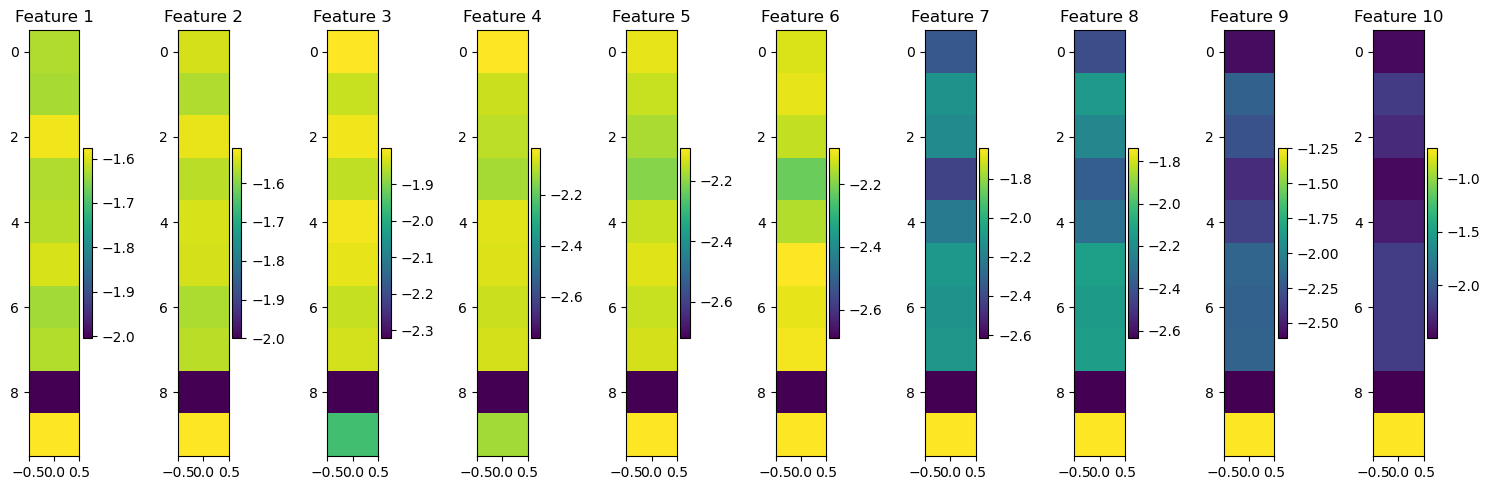

Evaluating layer at index: 160
Collected features for 500 samples from layer at index '160'.
Overall correlation score for the target layer: 0.04503570057930183
complete
Overall correlation score for the target layer: 0.04503570057930183


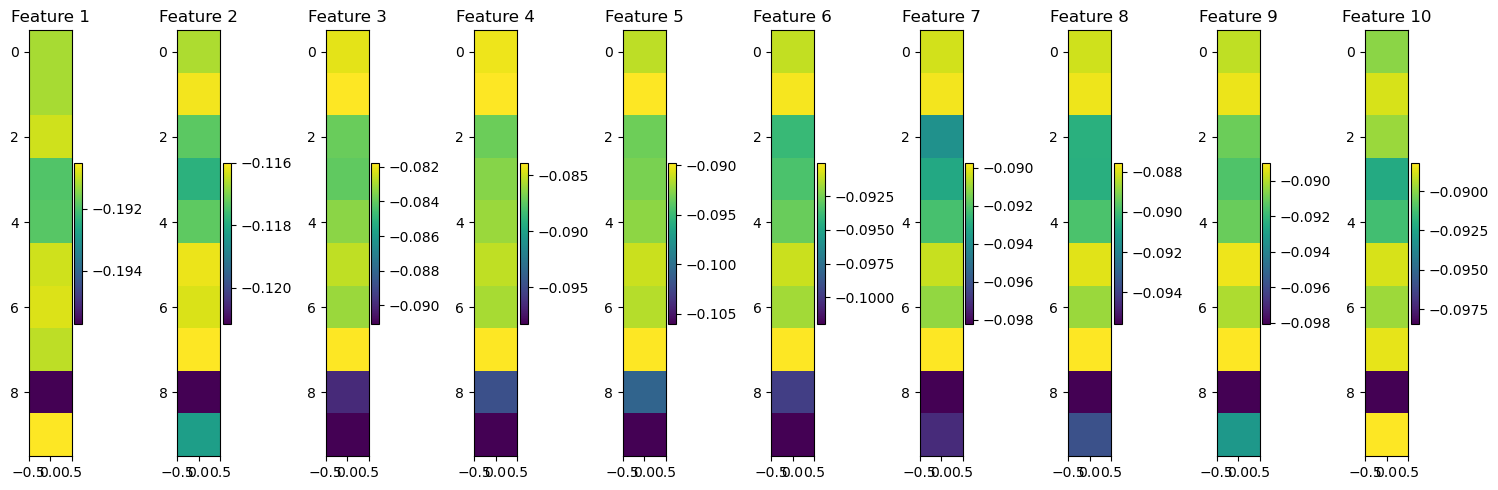

Evaluating layer at index: 180
Collected features for 500 samples from layer at index '180'.
Overall correlation score for the target layer: 0.0473604986006888
complete
Overall correlation score for the target layer: 0.0473604986006888


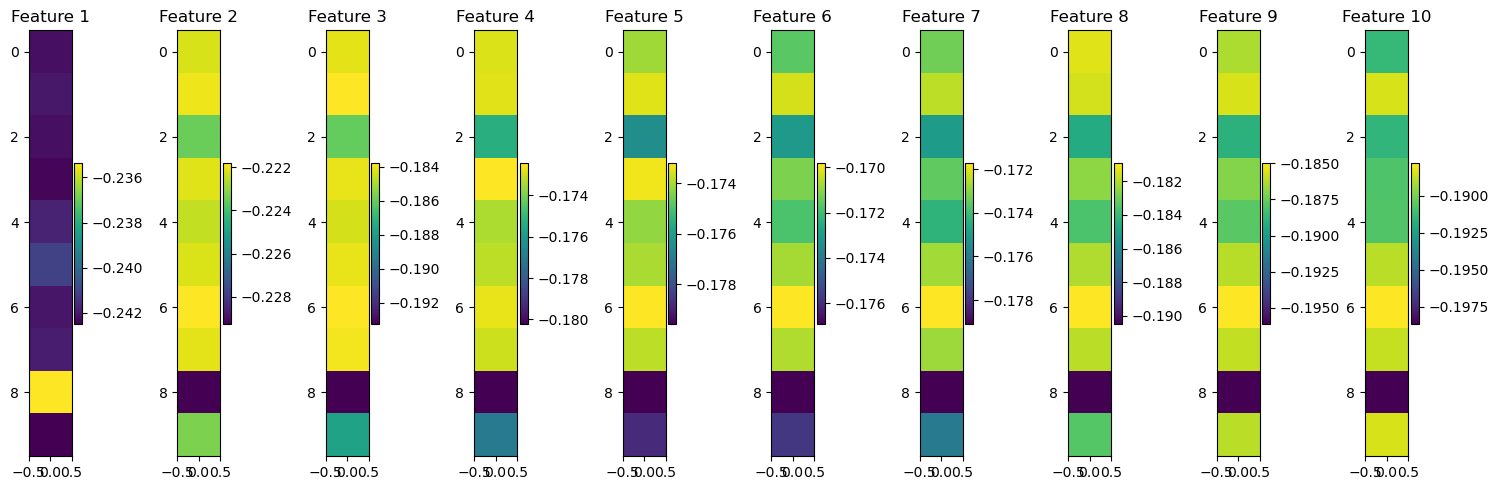

Evaluating layer at index: 200
Collected features for 500 samples from layer at index '200'.
Overall correlation score for the target layer: 0.04434721449851899
complete
Overall correlation score for the target layer: 0.04434721449851899


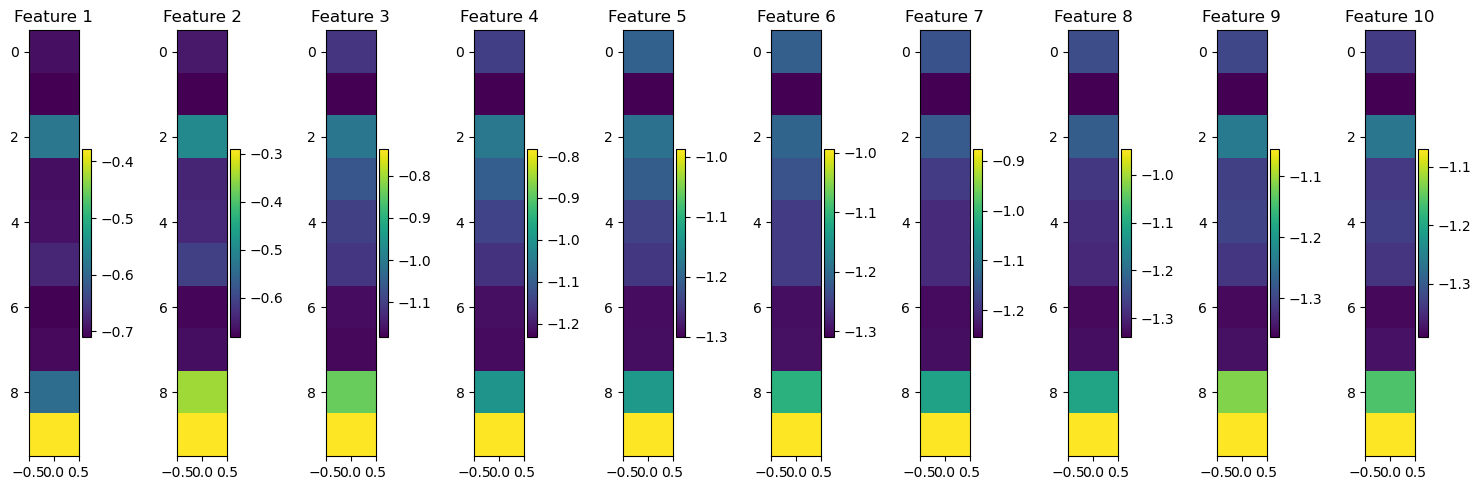

Evaluating layer at index: 220
Collected features for 500 samples from layer at index '220'.
Overall correlation score for the target layer: 0.04451930084822864
complete
Overall correlation score for the target layer: 0.04451930084822864


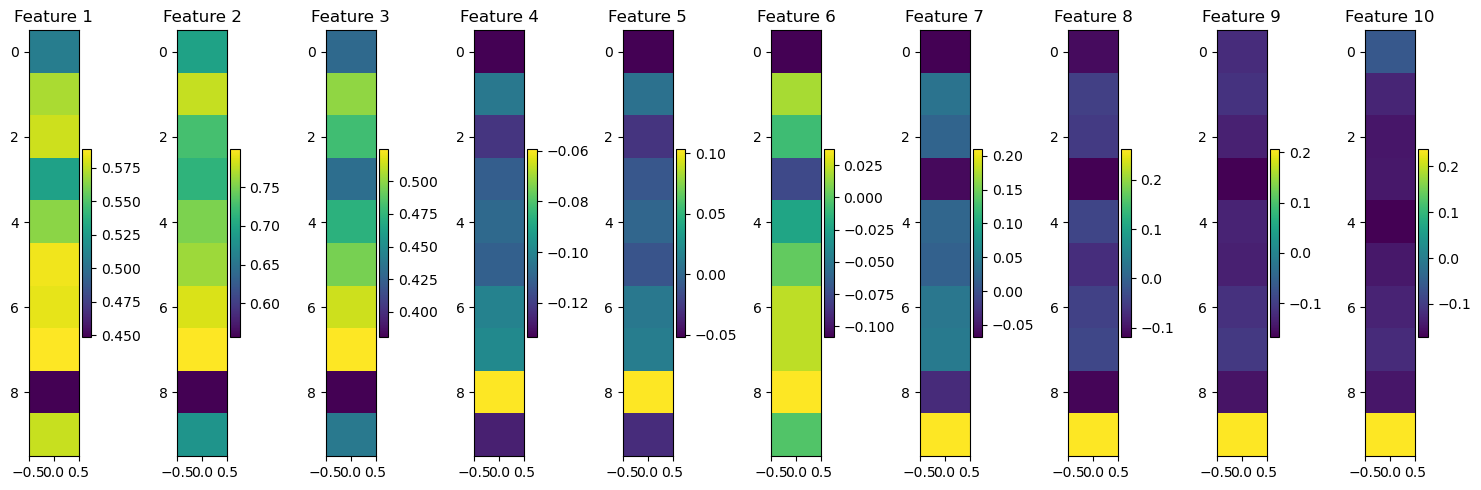

Evaluating layer at index: 240
Collected features for 500 samples from layer at index '240'.
Overall correlation score for the target layer: 0.045050876672115485
complete
Overall correlation score for the target layer: 0.045050876672115485


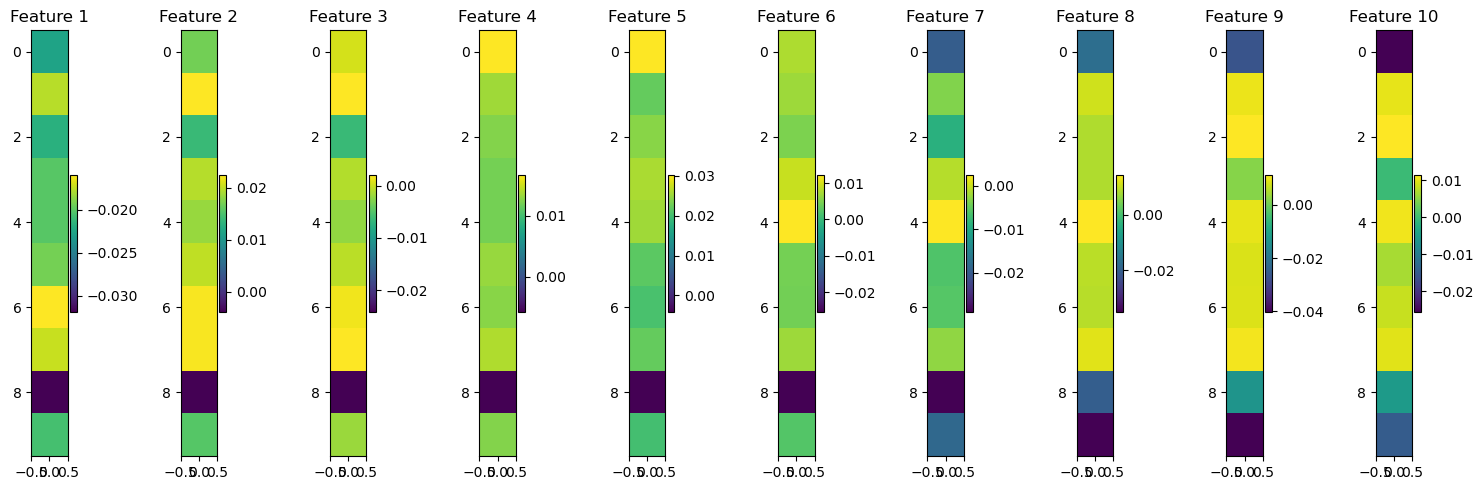

Evaluating layer at index: 260
Collected features for 500 samples from layer at index '260'.
Overall correlation score for the target layer: 0.044737569918718884
complete
Overall correlation score for the target layer: 0.044737569918718884


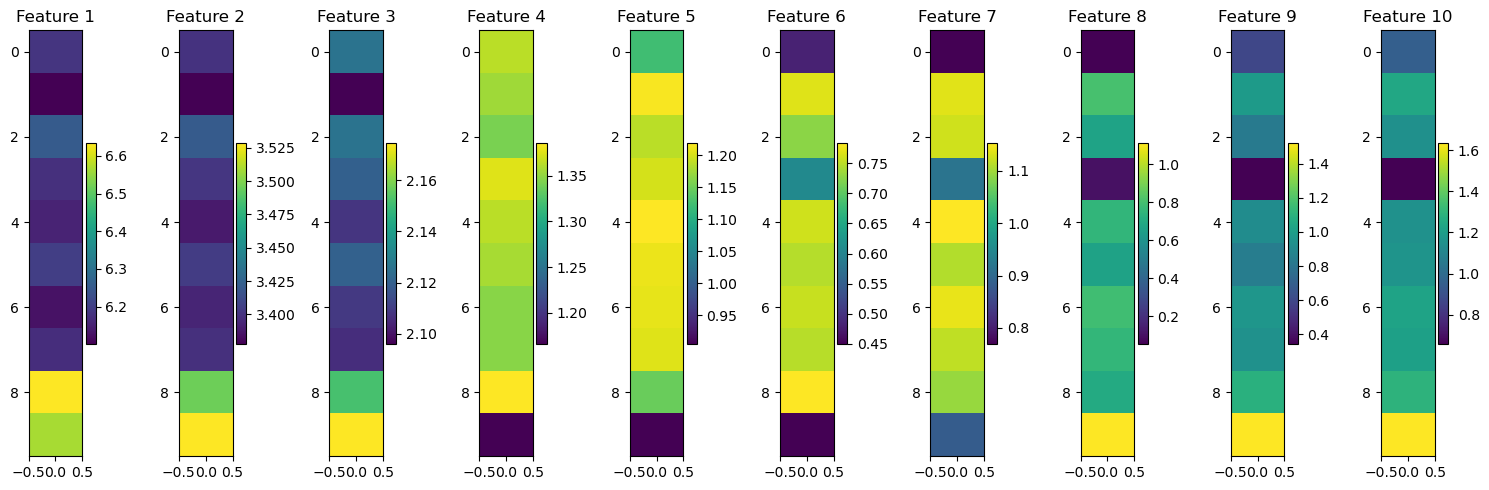

Evaluating layer at index: 280
Collected features for 500 samples from layer at index '280'.
Overall correlation score for the target layer: 0.044588185016564155
complete
Overall correlation score for the target layer: 0.044588185016564155


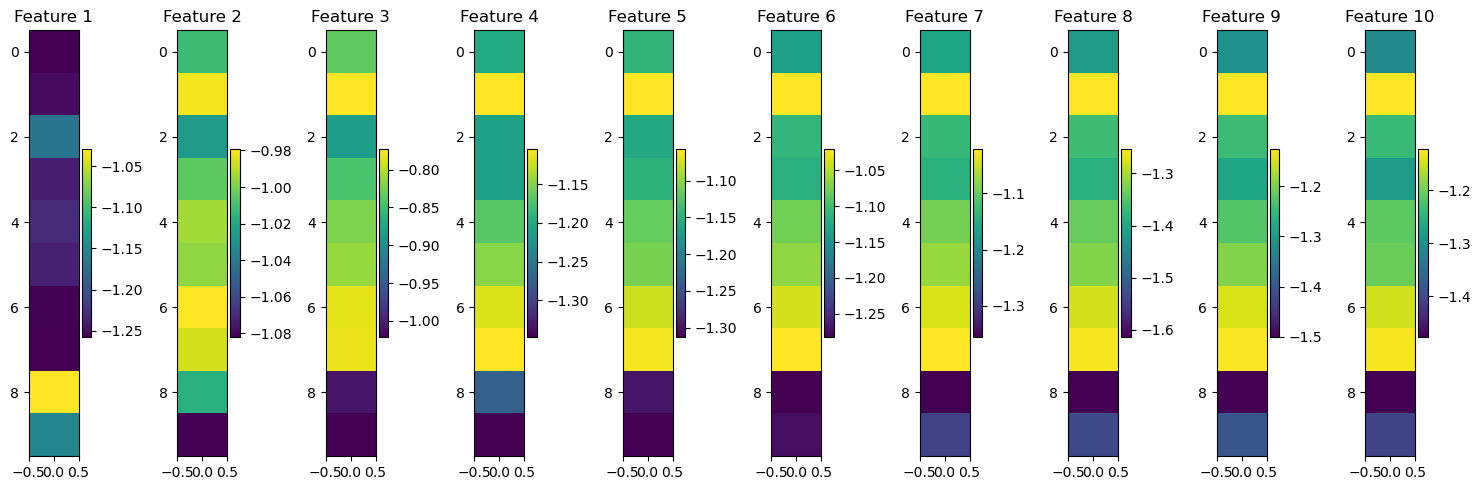

Layer Scores:
Layer 100: 0.05132412198837464
Layer 120: 0.04733728534946611
Layer 140: 0.05787736290354306
Layer 160: 0.04503570057930183
Layer 180: 0.0473604986006888
Layer 200: 0.04434721449851899
Layer 220: 0.04451930084822864
Layer 240: 0.045050876672115485
Layer 260: 0.044737569918718884
Layer 280: 0.044588185016564155
Best layer index: 140 with score: 0.05787736290354306
Collected features for 500 samples from layer at index '140'.
Overall correlation score for the target layer: 0.05787736290354306
complete
{'model_prediction': 0, 'confidence_score': 0.047083545, 'bounding_box': array([     188.94,      285.94,      242.82,      337.55], dtype=float32), 'nearest_neighbors': ['y315.jpg', 'y0.jpg', 'y317.jpg'], 'distances': array([[ 5.4302e+05,  5.4629e+05,   5.483e+05]], dtype=float32), 'filename': 'y726.jpg'}
{'model_prediction': 0, 'confidence_score': 0.034216367, 'bounding_box': array([      169.3,      220.61,      207.73,       189.1], dtype=float32), 'nearest_neighbors': ['y

In [2]:
import matplotlib.pyplot as plt
from yolov8_interpretable import InterpretableYOLOTest

def visualize_features(features, num_features=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_features):
        plt.subplot(1, num_features, i + 1)
        plt.imshow(features[:, i].reshape(-1, 1), aspect='auto', cmap='viridis')
        plt.colorbar()
        plt.title(f'Feature {i+1}')
    plt.tight_layout()
    plt.show()

def evaluate_multiple_layers(data_yaml_path, weights, layer_indices, batch_size=1, img_size=(640, 640)):
    layer_scores = {}
    for layer_index in layer_indices:
        print(f"Evaluating layer at index: {layer_index}")
        model = InterpretableYOLOTest(data_yaml_path, weights, batch_size=batch_size, img_size=img_size, target_layer_index=layer_index)
        score = model.calculate_pearson_correlation()
        layer_scores[layer_index] = score
        
        # Visualize features for the first few samples
        visualize_features(model.features[:10, :])
    return layer_scores

def empirical_validation(model, directory_path, k=5):
    # Perform inference on all images in a directory
    results = model.iterate_directory_inference(directory_path, k)
    for result in results:
        print(result)
    return results

def main():
    data = '/home/alan/Documents/YOLOV8_interpretable/Dataset_1/brain-tumor-detection-dataset/Br35H-Mask-RCNN/data.yaml'
    weights = '/home/alan/Documents/YOLOV8_interpretable/YOLOv8_weights/yolov8m_br35h.pt'
    
    # Evaluate layers at a broader range of indices
    layer_indices = list(range(100, 295, 20))  # Example: evaluating every 20th layer between 100 and 300
    layer_scores = evaluate_multiple_layers(data, weights, layer_indices)
    
    print("Layer Scores:")
    for layer_index, score in layer_scores.items():
        print(f"Layer {layer_index}: {score}")
    
    # Choose the best layer based on the scores
    best_layer_index = max(layer_scores, key=layer_scores.get)
    print(f"Best layer index: {best_layer_index} with score: {layer_scores[best_layer_index]}")
    
    # Create a model with the best layer
    best_model = InterpretableYOLOTest(data, weights, batch_size=1, img_size=(640, 640), target_layer_index=best_layer_index)
    
    # Perform empirical validation
    directory_path = '/home/alan/Documents/YOLOV8_interpretable/Dataset_1/brain-tumor-detection-dataset/Br35H-Mask-RCNN/test/images'
    empirical_validation(best_model, directory_path, k=3)

if __name__ == "__main__":
    main()
